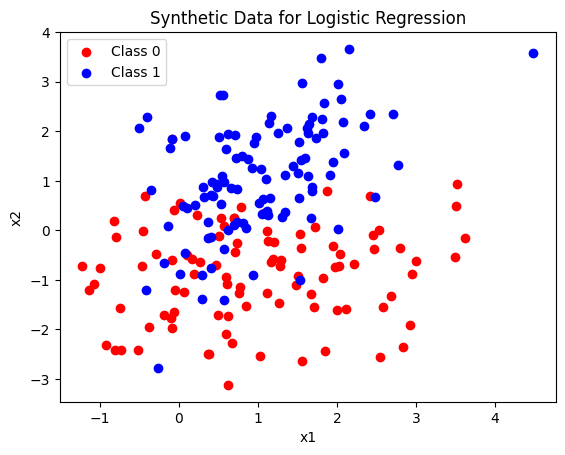

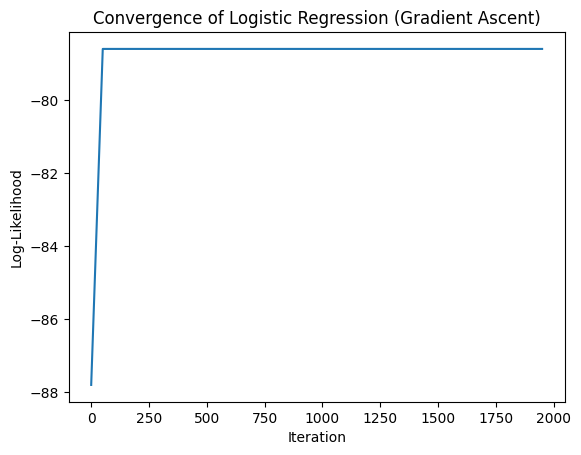

Learned weights (from scratch): [ 0.33410847 -0.43319486  1.75590608]
Scikit-Learn weights: [[ 0.28249228 -0.38331004  1.65705854]]


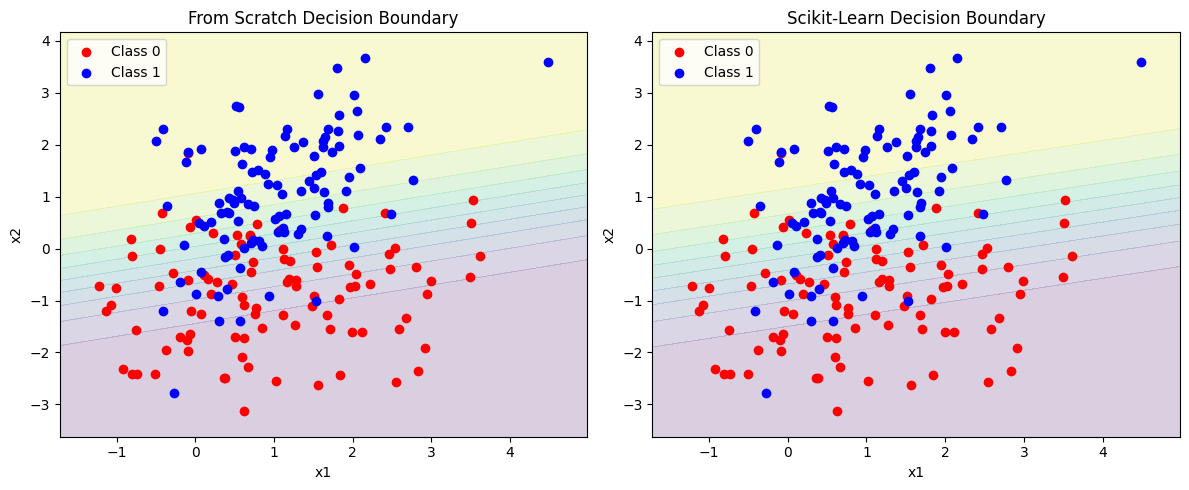

In [ ]:
# Logistic Regression from Scratch and with Scikit-Learn

# ECS171 — Lecture 4 Companion Notebook

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# 1. Generate synthetic dataset
X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, flip_y=0.05, random_state=42
)

# Add bias term (x0 = 1)
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Visualize the data
plt.scatter(X[y==0, 1], X[y==0, 2], color='red', label='Class 0')
plt.scatter(X[y==1, 1], X[y==1, 2], color='blue', label='Class 1')
plt.xlabel('x1'); plt.ylabel('x2')
plt.title('Synthetic Data for Logistic Regression')
plt.legend()
plt.show()

# 2. Helper functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, w):
    return sigmoid(np.dot(X, w))

def log_likelihood(X, y, w):
    preds = predict(X, w)
    # Avoid log(0)
    preds = np.clip(preds, 1e-10, 1-1e-10)
    return np.sum(y * np.log(preds) + (1 - y) * np.log(1 - preds))


# 3. Gradient ascent to learn weights
def logistic_regression(X, y, lr=0.01, epochs=1000):
    w = np.zeros(X.shape[1])
    history = []

    for epoch in range(epochs):
        preds = predict(X, w)
        gradient = np.dot(X.T, (y - preds))
        w += lr * gradient
        if epoch % 50 == 0:
            history.append(log_likelihood(X, y, w))
    return w, history

w, history = logistic_regression(X, y, lr=0.01, epochs=2000)

# Plot log-likelihood over iterations
plt.plot(np.arange(len(history))*50, history)
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood')
plt.title('Convergence of Logistic Regression (Gradient Ascent)')
plt.show()

print("Learned weights (from scratch):", w)

# 4. Compare with scikit-learn
clf = LogisticRegression(fit_intercept=False)
clf.fit(X, y)
print("Scikit-Learn weights:", clf.coef_)

# 5. Visualize decision boundary
def plot_boundary(X, y, w, title):
    x1_min, x1_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    x2_min, x2_max = X[:,2].min()-0.5, X[:,2].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                         np.linspace(x2_min, x2_max, 100))
    grid = np.c_[np.ones((xx.ravel().shape[0],1)), xx.ravel(), yy.ravel()]
    probs = predict(grid, w).reshape(xx.shape)
    plt.contourf(xx, yy, probs, alpha=0.2, levels=np.linspace(0,1,11))
    plt.scatter(X[y==0,1], X[y==0,2], c='red', label='Class 0')
    plt.scatter(X[y==1,1], X[y==1,2], c='blue', label='Class 1')
    plt.xlabel('x1'); plt.ylabel('x2')
    plt.title(title)
    plt.legend()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_boundary(X, y, w, "From Scratch Decision Boundary")
plt.subplot(1,2,2)
plot_boundary(X, y, clf.coef_.flatten(), "Scikit-Learn Decision Boundary")
plt.tight_layout()
plt.show()
